# Challenge 2: But with Linear Regression


## Let's pick up where we left off

I take the first part of the code from the previuos Notebook:

- Load the data
- Clean the data
- Encode the variables


In [13]:
from functions.data_processing import clean_data, linear_encoding, drop_columns, hot_key_encoding
import pandas as pd

# Load the dataset from the .csv file
diamonds = pd.read_csv("./datasets/diamonds/diamonds.csv")


cleaned_diamonds = clean_data(diamonds)
cleaned_diamonds = hot_key_encoding(cleaned_diamonds)
cleaned_diamonds = drop_columns(cleaned_diamonds)

cleaned_diamonds.head(5)

,carat,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,4733,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1.29,6424,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1.20,5510,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,1.50,8770,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0.90,4493,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False


# Here is the idea


### Linear Regression

After talking to Marta and Gabriel, they suggested I look for a linear relationship.


### Which function can fit?

Looking at the distribution we notice that can can be found a relation between the carat and the price.

This relation looks like a **Square function**.


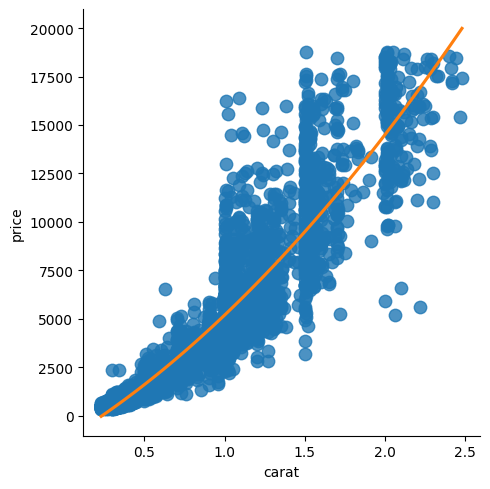

In [14]:
import seaborn as sns
sns.lmplot(x="carat", y="price", data=cleaned_diamonds,
           order=2, ci=None, scatter_kws={"s": 80}, line_kws={"color": "C1"})

So let build our model.

### Split the dataset

I want to fit the data in a model, so I split my data in:

- 75% Training data (`X_train`, `y_train`)
- 25% Test data (`X_test`, `y_test`) to evaluate the model


In [15]:
from sklearn.model_selection import train_test_split
X = cleaned_diamonds.drop(['price'], axis=1).copy()
y = cleaned_diamonds[['price']].copy() ** 0.5
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=27)
# X_train, X_test, y_train, y_test

## Fit the model


In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train), reg.get_params()

(0.9578345301007177,
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False})

### So, what is this function?

As we can expect we found an equation based on the `carat` little adjusted by other values.

The coefficient before every **_x_** is the feature importance.

The function is:

$$
y_{\text{price}} =
\alpha_\text{carat} \times x_{\text{carat}} +
\alpha_{\text{cut}_\text{Ideal}} \times x_{\text{cut}_\text{Ideal}} + ... +
\alpha_{\text{color}_\text{D}} \times x_{\text{color}_\text{D}} + ... +
\alpha_{\text{clarity}_\text{IF}} \times x_{\text{clarity}_\text{IF}} + ...
$$


In [17]:
feature_importance = pd.DataFrame(reg.coef_, columns=X.columns)
feature_importance

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,66.426723,-2.693584e+13,-2.693584e+13,-2.693584e+13,-2.693584e+13,-2.693584e+13,-4.880337e+13,-4.880337e+13,-4.880337e+13,-4.880337e+13,...,-4.880337e+13,-4.880337e+13,-5.382118e+13,-5.382118e+13,-5.382118e+13,-5.382118e+13,-5.382118e+13,-5.382118e+13,-5.382118e+13,-5.382118e+13


### How good is the model?

The model works fine, the is no overfitting.

As you can see the error on predicting the `train` set is similar to the error of the `test` set.


In [18]:
from sklearn.metrics import mean_absolute_error
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
mean_absolute_error(y_test, y_test_pred), mean_absolute_error(
    y_train, y_train_pred)

(3.9615607605603276, 4.124426522632714)

<Axes: xlabel='carat', ylabel='price'>

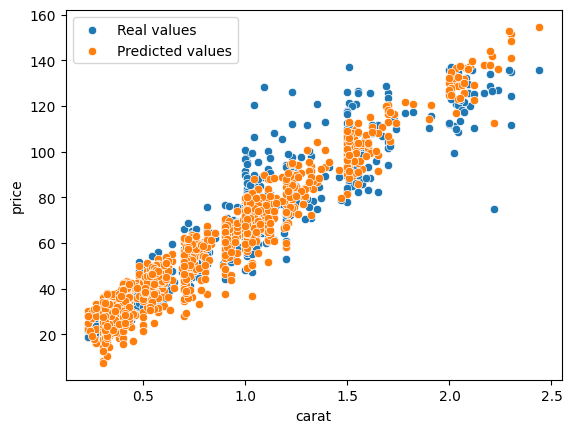

In [19]:
sns.scatterplot(x=X_test['carat'], y=y_test['price'], label='Real values')
sns.scatterplot(x=X_test['carat'],
                y=y_test_pred.flatten(), label='Predicted values')

<Axes: xlabel='carat', ylabel='price'>

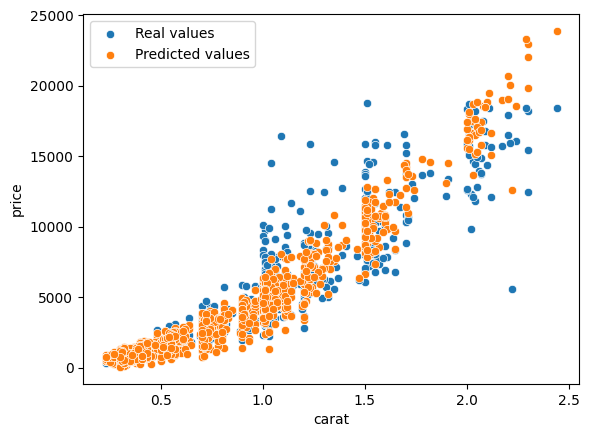

In [20]:
sns.scatterplot(x=X_test['carat'], y=y_test['price'] ** 2, label='Real values')
sns.scatterplot(x=X_test['carat'], y=y_test_pred.flatten()
                ** 2, label='Predicted values')

## What can we notice?

This estimator seems to work better than the Decision Tree.

The estimated points follow the distribution.


## What can be improved?

### Over-estimating diamonds of higher carat.

As can be seen from the scatter plot, the predictions for high-priced diamonds are higher than the actual values; perhaps a better function or relationship can be found.
